In [1]:
import pandas as pd
import numpy as np

## Load data (Titanic)

In [2]:
# load titanic data
train = pd.read_csv("data/train.csv", index_col="PassengerId")
print(train.shape)
train.head(5)

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Explore

In [3]:
# Exploratory data analysis
%matplotlib inline
import seaborn as sns

### Countplot

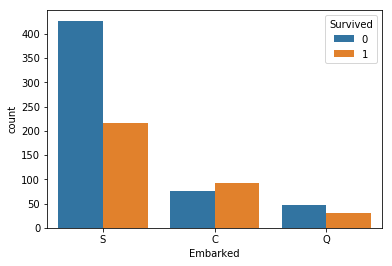

In [12]:
# 주로 classification 문제에 사용
sns.countplot(data=train, x="Embarked", hue="Survived")

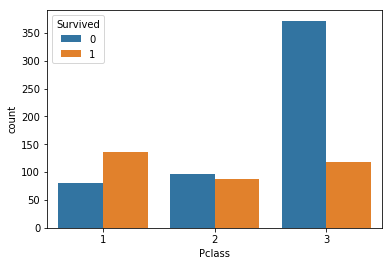

In [6]:
sns.countplot(data=train, x="Pclass", hue="Survived")

### Barplot

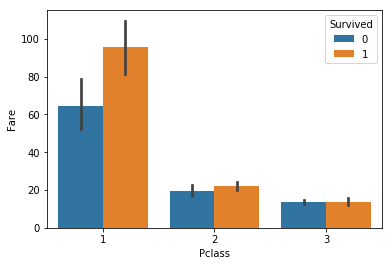

In [14]:
# 검정 bar 는 표준편차를 의미
# y 축은 숫자이며, 평균값임
# 주로 regression 문제에 사용
sns.barplot(data=train, x="Pclass", y="Fare", hue="Survived")

### Pointplot

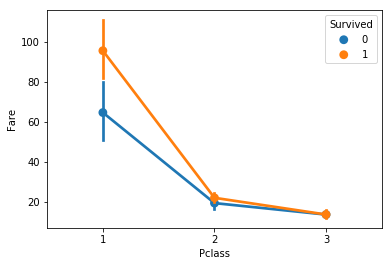

In [8]:
# x축이 서로 연관관계가 있을 경우, 없으면 barplot
sns.pointplot(data=train, x="Pclass", y="Fare", hue="Survived")

### Distplot

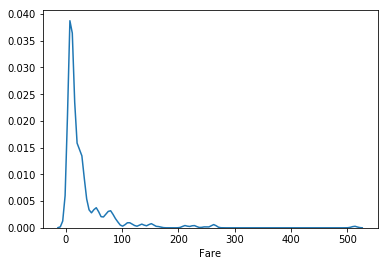

In [8]:
# bar는 histogram, hist=False 는 histogram 안그리도록
# histogram 사용시 bin_size 값을 정하는 것이 중요함
sns.distplot(train["Fare"], hist=False, bins=10)

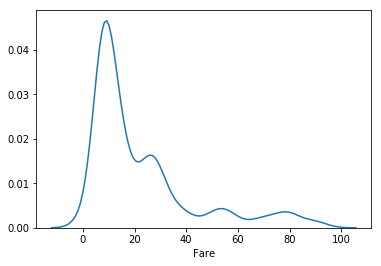

In [10]:
# outlier 제거후
low_fare = train[train["Fare"] < 100]
sns.distplot(low_fare["Fare"], hist=False)

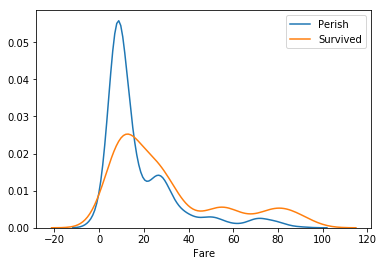

In [37]:
# distplot 은 입력데이터를 컬럼 단위로 지정하기 때문에 비교하기 위해서는 두번 그리면 됨
perish = low_fare[low_fare["Survived"] == 0]
survived = low_fare[low_fare["Survived"] == 1]
sns.distplot(perish["Fare"], hist=False, label="Perish")
sns.distplot(survived["Fare"], hist=False, label="Survived")

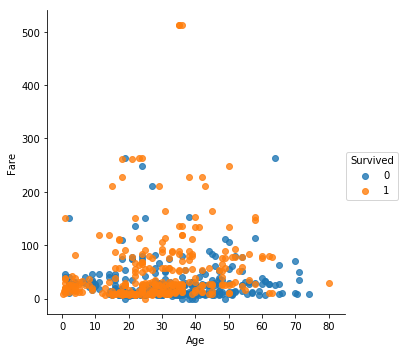

In [10]:
# fit_reg=False : regression line 제거
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

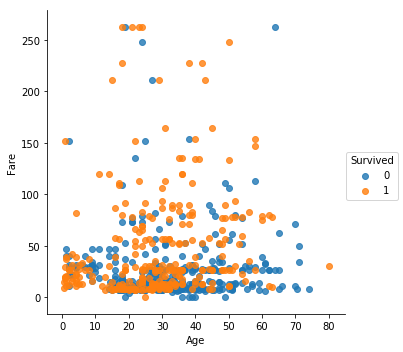

In [43]:
# outlier 제거
low_fare = train[train["Fare"] < 500]
sns.lmplot(data=low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

### Subplots

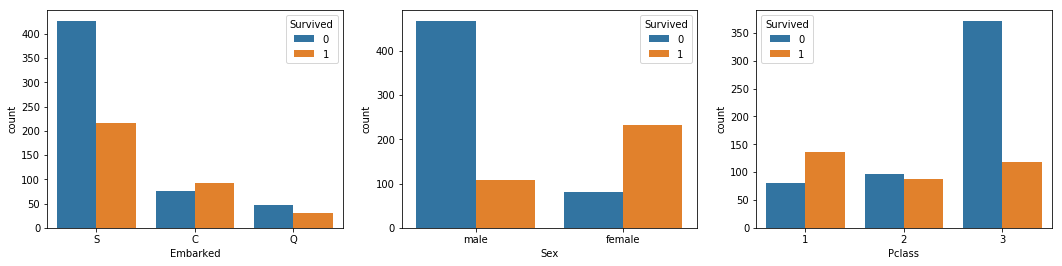

In [52]:
# matplot 에 있는 subplots 과 seaboarn 을 섞어서 사용
import matplotlib.pyplot as plt
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18, 4)

sns.countplot(data=train, x="Embarked", hue="Survived", ax=ax1)
sns.countplot(data=train, x="Sex", hue="Survived", ax=ax2)
sns.countplot(data=train, x="Pclass", hue="Survived", ax=ax3)

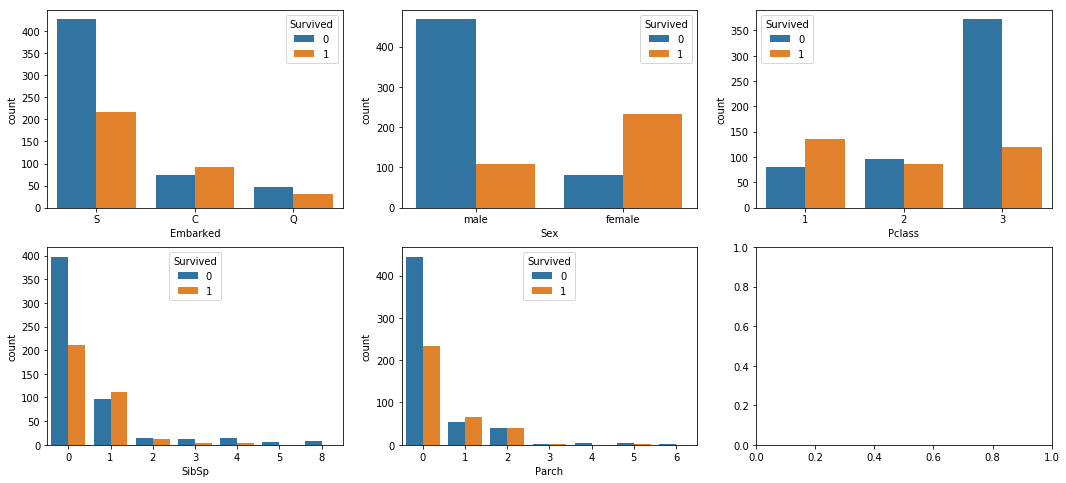

In [55]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)
         
sns.countplot(data=train, x="Embarked", hue="Survived", ax=ax1)
sns.countplot(data=train, x="Sex", hue="Survived", ax=ax2)
sns.countplot(data=train, x="Pclass", hue="Survived", ax=ax3)
sns.countplot(data=train, x="SibSp", hue="Survived", ax=ax4)
sns.countplot(data=train, x="Parch", hue="Survived", ax=ax5)

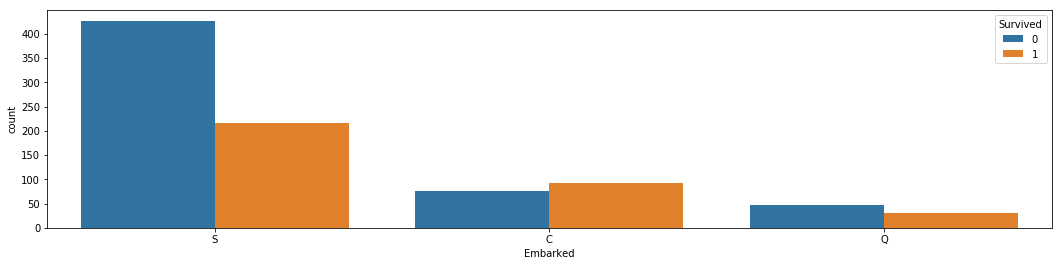

In [57]:
# subplots 를 이용해서 차트 하나의 가로/세로 사이즈를 조정하고 싶을 경우 응용
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
         
sns.countplot(data=train, x="Embarked", hue="Survived", ax=ax1)